## Challenge questions from David Sumpter's part 3 shot maps

Using the spatialsoccer library, this is how I would meet these challenges.

https://www.youtube.com/watch?v=oOAnERLiN5U

#### Exercise: 
1. Create a dataframe of passes which contains all the passes in the match
2. Plot the start point of every Sweden pass. Attacking left to right.
3. Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
4. Plot arrows to show where the passes we[re]

Loading up my libraries.

In [1]:
#dataframes and plotting
import geopandas as gpd
from shapely.geometry.point import Point
from shapely.geometry import LineString
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set()
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
#base libraries for analysis
from ssalib2 import SpatialSoccer

The way my library works is trying to find the matches first, then use the match object to load the events.

The Sweden v. England match has an id of 69301, so I find that match from the list.

In [3]:
sa = SpatialSoccer()
pitchgdf = SpatialSoccer.build_polygon_pitch_statsbomb()
team_name = "Sweden Women's"
player_name = "Sara Caroline Seger"
sb_matches = sa.get_match_list_from_source("open-data-master/data/matches/72/30.json",SpatialSoccer.STATS_BOMB_DATA)
for m in sb_matches:
    if m.match_id == 69301:
        break
vars(m)

{'match_id': 69301,
 'home_team_id': 865,
 'home_team_name': "England Women's",
 'home_team_score': 1,
 'away_team_id': 858,
 'away_team_name': "Sweden Women's",
 'away_team_score': 2,
 'season_id': 0,
 'season_name': '',
 'kick_off': '17:00:00.000',
 'match_date': '2019-07-06',
 'match_date_time': datetime.datetime(2019, 7, 6, 17, 0),
 'events': []}

Load the events from the match as a geodataframe, then grab all the pass events for all teams.

1. Create a dataframe of passes which contains all the passes in the match

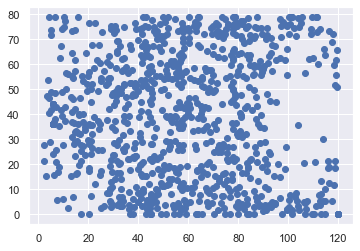

In [4]:
gdf = sa.load_events_from_match("open-data-master/data/events",SpatialSoccer.STATS_BOMB_DATA,m)
passes = gdf[gdf['event_name']=='Pass'].copy()
passes.plot()

Finally, plot all the pass events from Sweden's team.

2. Plot the start point of every Sweden pass. Attacking left to right.

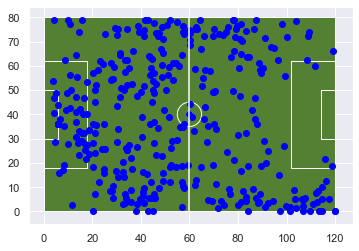

In [5]:
ax = pitchgdf.plot(facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR);
passes[passes['event_team_name']==team_name].plot(ax=ax,color='blue');

All points regardless of the period attack from left to right. You would need to flip by period to show a change in direction.

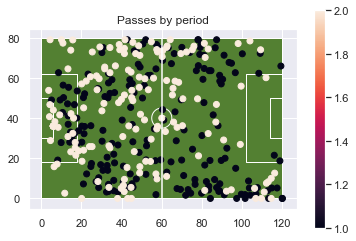

In [6]:
ax = pitchgdf.plot(facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR)
passes[passes['event_team_name']==team_name].plot(ax=ax,column='period',legend=True)
ax.set_title("Passes by period");

The point geometry that is default to the start point of the event.

3. Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)

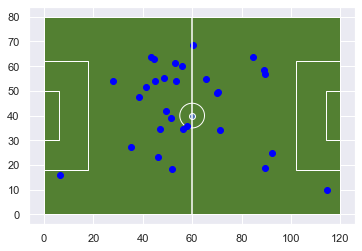

In [7]:
ax = pitchgdf.plot(facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR);
passes[passes['event_player']==player_name].plot(ax=ax,color='blue');

4. Plot arrows to show where the passes we[re]ax.scatter(

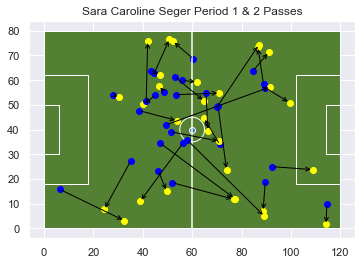

In [8]:
ax = pitchgdf.plot(facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR);
ax.set_title("{0} Period 1 & 2 Passes".format(player_name))
for i,row in passes[passes['event_player']==player_name].iterrows():
    try:
        ax.annotate("", xy=(row["start_x"], row["start_y"]), xytext=(row["end_x"], row["end_y"]),
                    arrowprops=dict(arrowstyle="<-",color="black"))
        ax.scatter(row["start_x"],row["start_y"],color="blue")
        ax.scatter(row["end_x"], row["end_y"],color="yellow")
    except:
        pass
plt.savefig("seger passes.png")

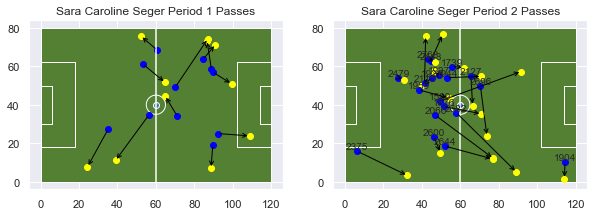

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title("{0} Period 1 Passes".format(player_name))
pitchgdf.plot(ax = ax, facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR);
for i,row in passes[(passes['event_player']==player_name)&(passes['period']==1)].iterrows():
    try:
        ax.annotate("", xy=(row["start_x"], row["start_y"]), xytext=(row["end_x"], row["end_y"]),
                    arrowprops=dict(arrowstyle="<-",color="black"))
        ax.scatter(row["start_x"],row["start_y"],color="blue")
        ax.scatter(row["end_x"], row["end_y"],color="yellow")
    except:
        pass

ax = fig.add_subplot(122)
ax.set_title("{0} Period 2 Passes".format(player_name))
pitchgdf.plot(ax = ax, facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR);
for i,row in passes[(passes['event_player']==player_name)&(passes['period']==2)].iterrows():
    try:
        ax.annotate("", xy=(row["start_x"], row["start_y"]), xytext=(row["end_x"], row["end_y"]),
                    arrowprops=dict(arrowstyle="<-",color="black"))
        ax.scatter(row["start_x"],row["start_y"],color="blue")
        ax.scatter(row["end_x"], row["end_y"],color="yellow")
        ax.text(x=row["start_x"],y=row["start_y"]+1,s =i,fontsize=10,ha='center')
    except:
        pass

As a check that this makes sense I was curious about index number 1904. It seemed like a strange or dangerous pass. I went back to the original json event information and checked into it. It does appear that the pass went out according to the outcome. I couldn't find any video for the full match, which would be interesting to see what ended up happening.

In [10]:
passes[(passes['event_player']==player_name)&(passes['period']==2)]['original_json'].iloc[3]

'{"id": "eea6c6f1-c5b5-46c5-8177-3f56eb9c2b39", "index": 1905, "period": 2, "timestamp": "00:08:30.709", "minute": 53, "second": 30, "type": {"id": 30, "name": "Pass"}, "possession": 110, "possession_team": {"id": 858, "name": "Sweden Women\'s"}, "play_pattern": {"id": 4, "name": "From Throw In"}, "team": {"id": 858, "name": "Sweden Women\'s"}, "player": {"id": 10224, "name": "Sara Caroline Seger"}, "position": {"id": 11, "name": "Left Defensive Midfield"}, "location": [114.5, 70.0], "duration": 1.579598, "related_events": ["3afe4e26-3ee2-43d1-956b-28daf6b5d018"], "pass": {"recipient": {"id": 24693, "name": "Hanna Glas"}, "length": 8.405355, "angle": 1.6064954, "height": {"id": 2, "name": "Low Pass"}, "end_location": [114.2, 78.4], "outcome": {"id": 75, "name": "Out"}, "body_part": {"id": 38, "name": "Left Foot"}}}'

## Homework questions

https://www.youtube.com/watch?v=oOAnERLiN5U

1. Think of a player who you enjoyed watching at the recent Men's or Women's World Cups.
    - I selected Megan Rapinoe.
    
2. What actions did they perform that were important and why?
    - She was one of the top goal scorers throughout the world cup. I suspect that the shots she was taking would have a high xg and that they would be close to the goal within the goal box.

3. Plot the actions and describe how the data supports or contradicts your own analysis.

4. Write a tweet/short blog post using at most two figures that illustrate your point.

In [11]:
all_us_matches =[]
player_name = "Megan Rapinoe"
for m in sb_matches:
    if m.home_team_name == "United States Women's":
        all_us_matches.append(m)
    elif m.away_team_name == "United States Women's":
        all_us_matches.append(m)
len(all_us_matches)

7

In [12]:
events = None
for m in all_us_matches:
    gdf = sa.load_events_from_match("open-data-master/data/events",SpatialSoccer.STATS_BOMB_DATA,m)
    try:
        events = events.append(gdf[(gdf['event_player']==player_name)&(gdf['event_name']=="Shot")],ignore_index=True,sort=False)
    except:
        try:
            events = gdf[(gdf['event_player']==player_name)&(gdf['event_name']=="Shot")].copy()
        except:
            pass
    del gdf

In [13]:
events.head()

,start_x,start_y,end_x,end_y,is_goal,period,match_id,xg,event_id,event_name,...,event_player,possession_id,timestamp,body_part,tags,original_json,event_time,start_point,end_point,geometry
0,108.1,39.9,120.0,43.7,1,1,69161,0.760000,0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe,Shot,...,Megan Rapinoe,12,00:06:06.236,None,None,"{""id"": ""0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe"",...",2019-06-24 18:06:06.236000000,POINT (108.1 39.9),POINT (120 43.7),POINT (108.10000 39.90000)
1,113.6,50.0,119.6,44.5,0,1,69161,0.271197,6c0c712b-ed13-45cc-a0d0-dce1f4c58539,Shot,...,Megan Rapinoe,24,00:12:48.506,None,None,"{""id"": ""6c0c712b-ed13-45cc-a0d0-dce1f4c58539"",...",2019-06-24 18:12:48.505999872,POINT (113.6 50),POINT (119.6 44.5),POINT (113.60000 50.00000)
2,114.7,37.9,115.4,38.1,0,1,69161,0.306364,0b4785b5-1ebc-4b9c-9026-8902be38a12e,Shot,...,Megan Rapinoe,32,00:16:46.329,None,None,"{""id"": ""0b4785b5-1ebc-4b9c-9026-8902be38a12e"",...",2019-06-24 18:16:46.328999936,POINT (114.7 37.9),POINT (115.4 38.1),POINT (114.70000 37.90000)
3,94.0,51.6,120.0,47.4,0,1,69161,0.016505,41a10cad-d3af-43b6-b0ce-ff5937572b5b,Shot,...,Megan Rapinoe,72,00:34:27.249,None,None,"{""id"": ""41a10cad-d3af-43b6-b0ce-ff5937572b5b"",...",2019-06-24 18:34:27.248999936,POINT (94 51.6),POINT (120 47.4),POINT (94.00000 51.60000)
4,108.0,40.0,120.0,43.7,1,2,69161,0.760000,a5a87567-a946-4860-9f5f-75436339c59d,Shot,...,Megan Rapinoe,138,00:30:36.196,None,None,"{""id"": ""a5a87567-a946-4860-9f5f-75436339c59d"",...",2019-06-24 19:33:51.600000000,POINT (108 40),POINT (120 43.7),POINT (108.00000 40.00000)


This said she had 14 attempts, and my dataframe has only 13. https://www.fifa.com/womensworldcup/players/player/212337/statistics

I'm not sure where the discrepancy was, but maybe the freekick is missing. I'll have to see if shots include freekicks.

Her average xg per shot (according to statsbomb's xg) was .28. The average for the goals she scored was .5 about.

In [14]:
events.xg.mean()

0.28225752138461535

In [18]:
events.xg.sum()

3.6693477779999997

In [15]:
events[events["is_goal"] == 1].xg.mean()

0.4965146755

Visually, you can see it is the shots closest to the goal that had the highest xg.

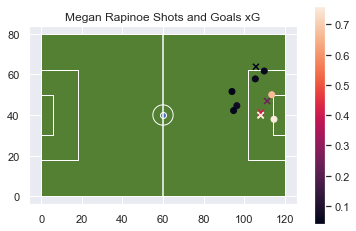

In [17]:
ax = pitchgdf.plot(facecolor = SpatialSoccer.GREEN_PITCH_COLOR,edgecolor=SpatialSoccer.WHITE_LINE_COLOR);
ax.set_title("{0} Shots and Goals xG".format(player_name))
events[events["is_goal"] == 1].plot(ax=ax,column="xg",legend=True,marker='x');
events[events["is_goal"] == 0].plot(ax=ax,column="xg");
plt.savefig("rapinoe shot xg.png")

I thought there would be a higher number of shots on the goal. It looks like there two really good opportunities that did not go in, but about half of the shots were outside the or nearly outside the box. 

The total xg was 3.6 or about 4 goals based on where she shot from. I think this means that she scored more than would be expected from an average player given the same placement of their shots. So this was surprising to me. I thought there would be better placement of her shots given her 6 goals, and that would have a higher total xg. 